In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import json
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
sns.set_style("whitegrid")
sns.set_context("poster")

In [435]:
# Update Data
%run scrape_tables.py

Using verbose: False
Using nice: True
Article at this link: https://en.wikipedia.org/wiki/1990–91_Premier_League doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1991–92_Premier_League doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1990–91_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1991–92_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1992–93_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1993–94_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1994–95_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1995–96_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1996–97_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1997–98_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org/wiki/1998–99_Ligue_1 doesn't exist
Article at this link: https://en.wikipedia.org

In [243]:
def positionate(df_):
    df = df_.copy()
    res = df.apply(lambda row: [[row['Year'],data] for data in row['Raw_Data']], axis=1)
    rawdata = pd.DataFrame([i for sublist in res for i in sublist])
    rawdata.columns = ["Year", "Points"]
    t = map(list, zip(*df.Raw_Data)) 
    tt = map(list, zip(*t))
    test = df.apply(lambda row: [[i+1, data] for i, data in enumerate(row['Raw_Data'])], axis=1)
    test_ = pd.DataFrame([i for sublist in test for i in sublist])
    test_.columns = ["Rank", "Points"]
    return test_, pd.DataFrame(t).index+1, pd.DataFrame(tt).std(), pd.DataFrame(tt).mean()

def dict_to_parsed_df(d):
    data = []
    for k, v in d.iteritems():
        if v is not None:
            try:
                temp = dict_to_df(v)
                temp.Pts = temp.Pts.astype(int)
                data.append([k, gini_coeff(temp.Pts), temp.Pts.mean(), temp.Pts.std(), temp.Pts, ])
            except AttributeError:
                temp = dict_to_df(v)
                temp.Pts = temp.Points.astype(int)
                temp.drop('Points', axis=1, inplace=True)
                data.append([k, gini_coeff(temp.Pts), temp.Pts.mean(), temp.Pts.std(), temp.Pts, ])
            except:
                print k
    df = pd.DataFrame(data)
    df.columns = ["Year", "Gini", "Mean", "Std", "Raw_Data"]
    df.sort('Year', inplace=True)
    return df.reset_index(drop=True)

def helper(df_):
    df = df_.copy()
    try:
        df['Team']
    except KeyError:
        for i, column in enumerate(df.columns):
            if len(column.split("Team")) > 1:
                df.insert(1, "Team", df.iloc[:,i], allow_duplicates=False)
                df.drop(column, 1, inplace=True)
    return df

def dict_to_df(v):
    try:
        temp = pd.DataFrame(v[1:], columns=v[0])
    except:
        temp = pd.DataFrame(v[1:], columns=v[0][:-1])
#        temp["Pos"] = range(1,len(temp)+1)
#        cols = temp.columns.tolist()
#        cols = cols[-1:] + cols[:-1]
#        temp = temp[cols]
    return helper(temp)

def gini_coeff(x):
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x))
    return 1 - (2.0 * (r*x).sum() + s)/(n*s)



In [4]:
def calc_gini(top, n):
    rest = [2*(n-1-top)]*(n-top)
    v = (6*(n-top))
    scores = [l+v for l in range(0, 6*top, 6)]+rest
    return gini_coeff(np.array(scores))

In [205]:
max_gini_dict = {n : max([calc_gini(top, n) for top in range(1,n+1)]) for n in range(16,26,2)}

In [352]:
def plot_gini(ns, colors, data = False):
    for c, n in zip(colors, ns):
        ginis = {top : (calc_gini(top, n), top)  for top in range(1,n+1)}
        a,b = max(ginis.values())
        plt.plot(ginis.keys(), zip(*ginis.values())[0], color=c, label='%i teams, Max of %.03f achieved with %i teams' % (n, a, b))
        plt.scatter(ginis.keys(), zip(*ginis.values())[0], color=c, s=60)
        plt.ylabel("Gini Score")
        plt.xlabel("Number of Dominant Teams");
    plt.legend(loc='lower right', prop={'size':20})
    plt.xlim(0,max(ns)+1)
    plt.ylim(0,.4)

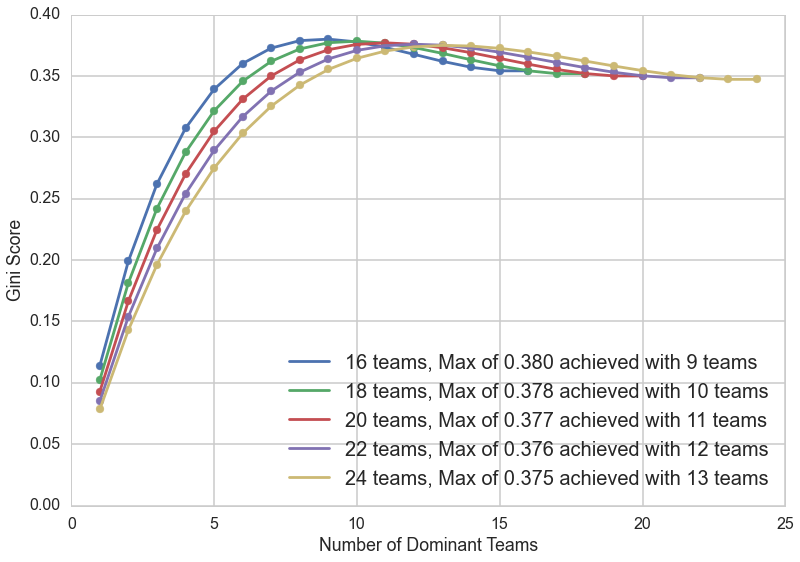

In [353]:
plot_gini(range(16,26,2), sns.color_palette(), data=True)

In [437]:
leagues = ["England", "Germany", "Portugal", "France", "Italy", "Spain"]

In [438]:
d = {}
for l in leagues:
    with open(l+'_PL_tables.json', 'r') as fp:
        d_ = json.load(fp)
        df = dict_to_parsed_df(d_)
        df.Year = df.Year.astype(int)
        d[l] = df

In [470]:
d

{'England':     Year      Gini       Mean        Std  \
 0   1992  0.094818  57.090909  10.373543   
 1   1993  0.148860  56.545455  15.454163   
 2   1994  0.153718  56.909091  16.323833   
 3   1995  0.159885  52.100000  15.161933   
 4   1996  0.127407  50.900000  12.043343   
 5   1997  0.129522  52.250000  12.430332   
 6   1998  0.145902  51.250000  13.999530   
 7   1999  0.166317  52.400000  16.063689   
 8   2000  0.148268  51.950000  13.971682   
 9   2001  0.171944  51.950000  16.687452   
 10  2002  0.154000  52.500000  15.322842   
 11  2003  0.152810  51.600000  15.177546   
 12  2004  0.172330  51.500000  17.083387   
 13  2005  0.189699  53.150000  18.610340   
 14  2006  0.163148  52.100000  15.850950   
 15  2007  0.204615  52.000000  19.735088   
 16  2008  0.185954  52.150000  18.236098   
 17  2009  0.201981  51.750000  18.873192   
 18  2010  0.131827  51.450000  12.779404   
 19  2011  0.178653  52.350000  17.439444   
 20  2012  0.184981  51.600000  17.818973   

In [439]:
d['England']

,Year,Gini,Mean,Std,Raw_Data
0,1992,0.094818,57.090909,10.373543,0 84 1 74 2 72 3 71 4 63 5...
1,1993,0.148860,56.545455,15.454163,0 92 1 84 2 77 3 71 4 70 5...
2,1994,0.153718,56.909091,16.323833,0 89 1 88 2 77 3 74 4 73 5...
3,1995,0.159885,52.100000,15.161933,0 82 1 78 2 71 3 63 4 63 5...
4,1996,0.127407,50.900000,12.043343,0 75 1 68 2 68 3 68 4 61 5...
5,1997,0.129522,52.250000,12.430332,0 78 1 77 2 65 3 63 4 59 5...
6,1998,0.145902,51.250000,13.999530,0 79 1 78 2 75 3 67 4 57 5...
7,1999,0.166317,52.400000,16.063689,0 91 1 73 2 69 3 67 4 65 5...
8,2000,0.148268,51.950000,13.971682,0 80 1 70 2 69 3 68 4 66 5...
9,2001,0.171944,51.950000,16.687452,0 87 1 80 2 77 3 71 4 66 5...


In [440]:
points_per_win_dict_mask = {k : [sum(r)>len(r)*(len(r)-1)*2 for r in v.Raw_Data] for k, v in d.iteritems()}
league_size_dict = {k : {y : len(r) for r, y in zip(v.Raw_Data, v.Year)} for k, v in d.iteritems()}

In [444]:
points_per_win_dict_mask

{'England': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False],
 'France': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False],
 'Germany': [False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False],
 'Italy': [False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False],
 'Portugal': [False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False],
 'S

In [468]:
def giniPercent(k, v):
    array = []
    l = league_size_dict[k]
    for g, y, i in zip(v.Gini, v.Year, points_per_win_dict_mask[k]):
        if i:
            array.append(g/max_gini_dict[l[y]])
        else:
            array.append(np.nan)
    return array

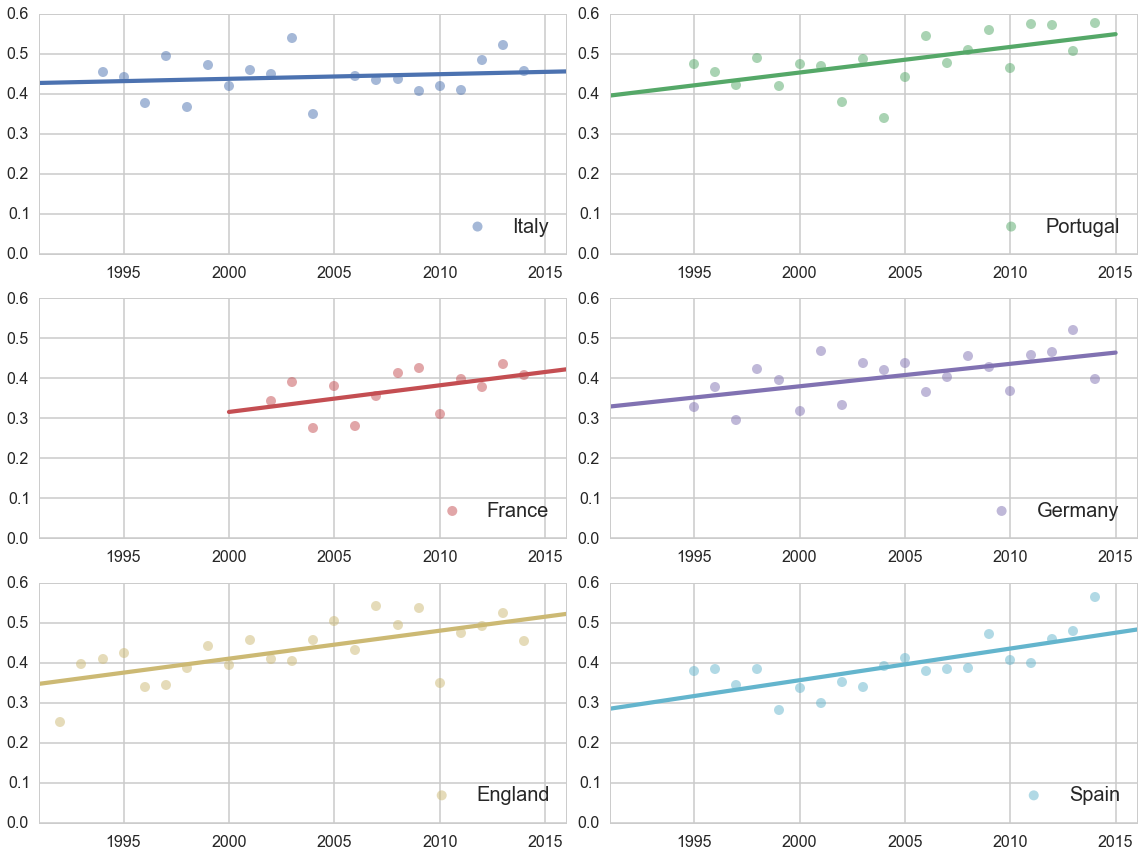

In [469]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12), tight_layout = True)

for ax, (k, v)  in zip(axes.ravel(), d.iteritems()):
    temp = giniPercent(k, v)
    sns.regplot(x = np.array(v.Year), y = np.array(temp), data = v, scatter_kws={'s':100, 'alpha' : .5}, label = k, ci = None, ax=ax)
    ax.legend(loc='lower right', prop={'size':20})
    ax.set_xlim(1991,2016)
    ax.set_ylim(0,.6);

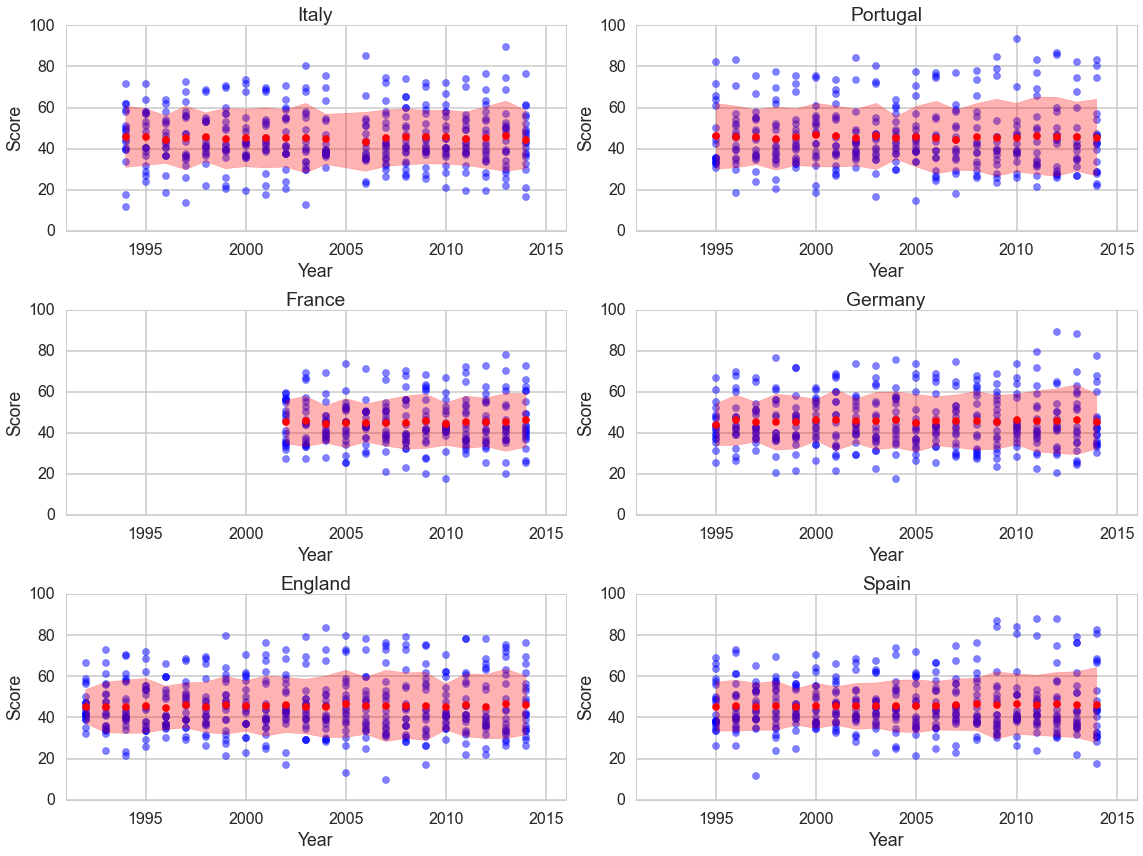

In [447]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12), tight_layout = True)

for ax, (k, v)  in zip(axes.ravel(), d.iteritems()):
    df = v[points_per_win_dict_mask[k]]
    res = df.apply(lambda row: [[row['Year'],data] for data in row['Raw_Data']], axis=1)
    rawdata = pd.DataFrame([i for sublist in res for i in sublist])
    rawdata.columns = ["Year", "Points"]
    t = league_size_dict[k]
    rawdata_ = rawdata.apply(lambda row: [row['Year'], 100*row['Points']/float((t[row['Year']]-1)*6)], axis = 1)

    gb = rawdata_.groupby(by='Year', )
    y = gb['Points'].mean()
    std = gb['Points'].std()
    x = df.Year
    #y = df.Mean
    #std = df.Std
    ax.scatter(x = rawdata_['Year'], y = rawdata_['Points'], color='b', alpha=.5, s=50)
    ax.scatter(x = x, y = y,color='r', s = 50)
    ax.fill_between(x, y-std, y+std, color='r', alpha=.3)
    ax.set_ylim(0,100)
    ax.set_xlim(1991,2016)
    ax.set_ylabel('Score')
    ax.set_xlabel('Year')
    ax.set_title(k);

In [10]:
lm = smf.ols(formula='Year ~ Mean', data=df[3:-1]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Year   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sun, 06 Dec 2015   Prob (F-statistic):              0.217
Time:                        13:45:59   Log-Likelihood:                -62.547
No. Observations:                  20   AIC:                             129.1
Df Residuals:                      18   BIC:                             131.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1846.1933    123.613     14.935      0.000      1586.492  2105.895
Mean           3.0432      2.376      1.281      0.217        -1.949     8.035
==============================================================================
Omnibus:                        2.681   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                1.169
Skew:                          -0.000   Prob(JB):                        0.557
Kurtosis:                       1.816   Cond. No.                     4.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
print df.Gini[3:11]
print df.Gini[-9:-1]
df.Gini[3:-1]

3     0.159885
4     0.127407
5     0.129522
6     0.145902
7     0.166317
8     0.148268
9     0.171944
10    0.154000
Name: Gini, dtype: float64
15    0.204615
16    0.185954
17    0.201981
18    0.131827
19    0.178653
20    0.184981
21    0.197552
22    0.171394
Name: Gini, dtype: float64


3     0.159885
4     0.127407
5     0.129522
6     0.145902
7     0.166317
8     0.148268
9     0.171944
10    0.154000
11    0.152810
12    0.172330
13    0.189699
14    0.163148
15    0.204615
16    0.185954
17    0.201981
18    0.131827
19    0.178653
20    0.184981
21    0.197552
22    0.171394
Name: Gini, dtype: float64

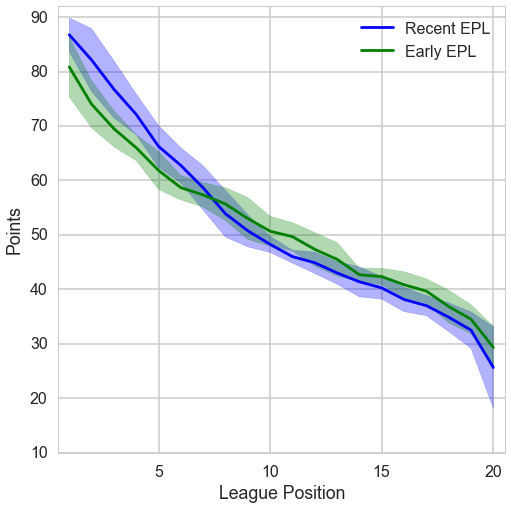

In [12]:
test_, pos, std, mean, = positionate(df[-9:-1])
test__, pos_, std_, mean_, = positionate(df[3:9])
#test___, pos__, std__, mean__, = positionate(df[9:15])
#pos = pd.DataFrame(tt).index+1
#std = pd.DataFrame(tt).std()
#mean = pd.DataFrame(tt).mean()
plt.figure(figsize=(8, 8))
#plt.scatter(x = test_['Rank'], y = test_['Points'], color='b', alpha=.5)
#plt.scatter(x = test__['Rank'], y = test__['Points'], color='g', alpha=.5)
#plt.scatter(x = test___['Rank'], y = test___['Points'], color='r', alpha=.5)
plt.plot(pos, mean, color='b', linestyle='-', label = "Recent EPL")
plt.plot(pos_, mean_, color='g', linestyle='-', label = "Early EPL")
#plt.plot(pos__, mean__, color='r', linestyle='-')
plt.fill_between(pos, mean-std, mean+std, color='b', alpha=.3)
plt.fill_between(pos_, mean_-std_, mean_+std_, color='g', alpha=.3)
plt.xlim([0.5,20.5])
plt.ylim([min(test_.Points)-1,max(test__.Points)+1]);
plt.xlabel('League Position')
plt.ylabel('Points')
plt.legend(frameon=False, loc='upper right')
#x_ = np.array(x)
#y_ = intercept + slope * x_
#plt.plot(x_, y_, 'r-');

In [13]:
#clhist_ = {'Year' : ['Champs', 'RunnerUp', 'Semis', 'Quarters', 'Sixteens', 'Group']}
#clhist = {k: "" for k in keys}

In [14]:
#clhist

In [15]:
def updateDict(d, array, verbose=False, limited=True):
    if len(array) != 7:
        raise ValueError("Need length of 7.  Format is Year, Champs, RunnerUp, Semis, Quarters, Sixteens, Group")
    else:
        d[array[0]] = list(array[1:])
    if verbose:
        limited = False
        temp = d.copy()
        del temp['Year']
        print temp
    if limited:
        print {array[0]: d.copy().pop(array[0])}

In [16]:
#vals = [2000,3,2,2,0,0,0]
#vals = [vals[0]]+vals[:0:-1]
#updateDict(clhist, vals)

In [17]:
def cldict_to_df(d):
    return pd.DataFrame([[k]+v for k, v in d.iteritems() if k != 'Year'], columns = ['Year']+d['Year'])

def transformList(lst):
    nlist = lst.copy()
    count = 0
    for i, v in enumerate(lst):
        if i > 1:
            nlist[i] = v-count
            count = count+nlist[i]
        elif i == 1:
            pass
        else:
            count = v + lst[i+1]
    return nlist

def scorereHelper(lst):
    nlst = transformList(lst)
    val = 0 
    weight = 1.
    for l in nlst:
        val = val + l*weight
        weight = weight/2
    return val

def clscorer(df):
    return pd.DataFrame(zip(df.Year ,df.apply(lambda x : scorereHelper(x[1:]), axis=1)), columns=['Year', 'Score'])

In [18]:
#cldf = cldict_to_df(clhist)

In [19]:
#cldf.to_json('CL_Res.json')

In [20]:
cldf = pd.read_json('CL_Res.json')

In [21]:
cldf

,Champs,Group,Quarters,RunnerUp,Semis,Sixteens,Year
0,0,3,2,0,0,2,2000
1,0,3,3,0,1,3,2001
10,0,4,2,0,0,3,2010
11,0,4,3,1,1,4,2011
12,1,4,1,0,1,2,2012
13,0,4,0,0,0,2,2013
14,0,4,2,0,1,4,2014
15,0,4,0,0,0,3,2015
2,0,3,2,0,1,3,2002
3,0,4,1,0,0,3,2003


In [22]:
cldf = cldf[['Year', 'Champs', 'RunnerUp', 'Semis', 'Quarters', 'Sixteens', 'Group']]
cldf.sort('Year', inplace=True)
cldf

,Year,Champs,RunnerUp,Semis,Quarters,Sixteens,Group
0,2000,0,0,0,2,2,3
1,2001,0,0,1,3,3,3
2,2002,0,0,1,2,3,3
3,2003,0,0,0,1,3,4
4,2004,0,0,1,2,3,3
5,2005,1,0,2,2,4,4
6,2006,0,1,1,1,3,4
7,2007,0,1,3,3,4,4
8,2008,1,1,3,4,4,4
9,2009,0,1,3,4,4,4


In [23]:
cldf_ = clscorer(cldf)

In [24]:
cldf_['Gini'] = np.array(df[-16:].Gini)

(1999, 2015)

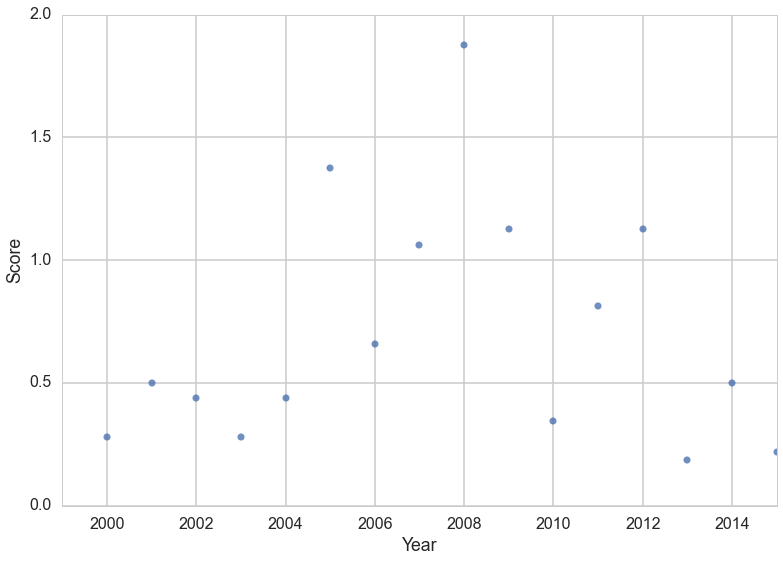

In [25]:
plt1 = sns.regplot(x = 'Year', y = 'Score', data = cldf_, fit_reg=False, scatter_kws={'s': 50})
plt1.set_xlim(1999, 2015)

In [26]:
cldf_

,Year,Score,Gini
0,2000,0.28125,0.148268
1,2001,0.50000,0.171944
2,2002,0.43750,0.154000
3,2003,0.28125,0.152810
4,2004,0.43750,0.172330
5,2005,1.37500,0.189699
6,2006,0.65625,0.163148
7,2007,1.06250,0.204615
8,2008,1.87500,0.185954
9,2009,1.12500,0.201981


In [27]:
smf.ols(formula = 'Gini ~ Score', data = cldf_).fit().summary()

c:\Anaconda\lib\site-packages\scipy\stats\stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gini   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.065
Date:                Sun, 06 Dec 2015   Prob (F-statistic):              0.102
Time:                        13:46:01   Log-Likelihood:                 40.581
No. Observations:                  16   AIC:                            -77.16
Df Residuals:                      14   BIC:                            -75.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1625      0.009     17.677      0.000         0.143     0.182
Score          0.0191      0.011      1.751      0.102        -0.004     0.042
==============================================================================
Omnibus:                        0.475   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.307
Skew:                           0.303   Prob(JB):                        0.858
Kurtosis:                       2.693   Cond. No.                         3.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
def temp(d):
    d_new = {}
    for year in d.keys():
        try:
            tempdf = d[year-1]
        except KeyError:
            print "Data not found for ", year-1
        else:
            d_new[year] = zip(helper(tempdf), helper(d[year]))
    return d_new


In [474]:
d.values()

[    Year      Gini       Mean        Std  \
 0   1990  0.147422  34.000000   9.184386   
 1   1991  0.167211  34.000000  10.476865   
 2   1992  0.123094  34.000000   8.000000   
 3   1993  0.141794  34.000000   9.267273   
 4   1994  0.172348  46.722222  15.215339   
 5   1995  0.166932  46.555556  14.047073   
 6   1996  0.142702  45.333333  11.911438   
 7   1997  0.187391  46.166667  15.767614   
 8   1998  0.139055  46.500000  12.123143   
 9   1999  0.178937  45.777778  14.953086   
 10  2000  0.158902  46.111111  14.261791   
 11  2001  0.174288  46.166667  14.940076   
 12  2002  0.169761  45.888889  14.195645   
 13  2003  0.203838  46.000000  17.283110   
 14  2004  0.131379  50.750000  13.912792   
 15  2006  0.167510  49.400000  16.339813   
 16  2007  0.163619  51.400000  15.642049   
 17  2008  0.164928  52.250000  15.562692   
 18  2009  0.153468  51.900000  14.735921   
 19  2010  0.158173  52.000000  14.984202   
 20  2011  0.154301  51.150000  14.808515   
 21  2012 

In [471]:
table_dict = {int(k): dict_to_df(v) for k, v in d.iteritems() if v is not None and int(k) != 2015}

ValueError: invalid literal for int() with base 10: 'Italy'

In [30]:
l = []
for k, v in table_dict.iteritems():
    l = l+list(v['Team'])

In [31]:
dict_to_df(d['2015'])

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Leicester City,15,9,5,1,32,21,+11,32,Qualification to Champions League group stage
1,2,Arsenal,15,9,3,3,27,13,+14,30,None
2,3,Manchester City,15,9,2,4,30,16,+14,29,None
3,4,Manchester United,15,8,5,2,20,10,+10,29,Qualification to Champions League play-off round
4,5,Tottenham Hotspur,15,6,8,1,25,12,+13,26,Qualification to Europa League group stage
5,6,West Ham United,15,6,5,4,25,21,+4,23,
6,7,Liverpool,14,6,5,3,18,15,+3,23,None
7,8,Crystal Palace,14,7,1,6,19,14,+5,22,None
8,9,Watford,15,6,4,5,17,16,+1,22,None
9,10,Stoke City,15,6,4,5,13,14,−1,22,None


In [32]:
translations = {v: v for v in np.unique(l)}

In [33]:
def scrubbed(d, splits = ['\\', '!', "("]):
    tpl = d.values()
    for s in splits:
        tpl = tuple([v.split(s)[0].rstrip() for v in tpl])
    tpl = np.unique(tpl)
    for k, v in d.iteritems():
        for t in tpl:
            if t in v:
                d[k] = t
    print "Scrubbed"
    return d
        
def parsed_dict(d, rigorous = False):
    translations = d.copy()
    again = True
    while again:
        values = np.unique(translations.values())
        init_len = len(values)
        for k, v in translations.iteritems():
            for val in values:
                if val in k:
                    try:
                        translations[k] = translations[val]
                    except KeyError:
                        translations[k] = val
        fin_len = len(np.unique(translations.values()))
        if init_len == fin_len:
            print "Compressed to", fin_len
            again = False
        else:
            print "Compressing from", init_len, "to", fin_len,"..."
    if rigorous:
        return parsed_dict(scrubbed(translations))
    else:
        return translations
    
def parse(a):
    return [translations_[t] for t in a]

In [34]:
translations_ = parsed_dict(translations, rigorous=True)

Compressing from 135 to 63 ...
Compressing from 63 to 54 ...
Compressed to 54
Scrubbed
Compressed to 46


In [35]:
np.unique(translations_.values())

array([u'Arsenal', u'Aston Villa', u'Barnsley', u'Birmingham City',
       u'Blackburn Rovers', u'Blackpool', u'Bolton Wanderers',
       u'Bradford City', u'Burnley', u'Cardiff City', u'Charlton Athletic',
       u'Chelsea', u'Coventry City', u'Crystal Palace', u'Derby County',
       u'Everton', u'Fulham', u'Hull City', u'Ipswich Town',
       u'Leeds United', u'Leicester City', u'Liverpool',
       u'Manchester City', u'Manchester United', u'Middlesbrough',
       u'Newcastle United', u'Norwich City', u'Nottingham Forest',
       u'Oldham Athletic', u'Portsmouth', u'Queens Park Rangers',
       u'Reading', u'Sheffield United', u'Sheffield Wednesday',
       u'Southampton', u'Stoke City', u'Sunderland', u'Swansea City',
       u'Swindon Town', u'Tottenham Hotspur', u'Watford',
       u'West Bromwich Albion', u'West Ham United', u'Wigan Athletic',
       u'Wimbledon', u'Wolverhampton Wanderers'], 
      dtype='<U23')

In [36]:
def translate(c1, c2, translations = translations_):
    c1_ = [translations_[s] for s in c1]
    c2_ = [translations_[t] for t in c2]
    d = {}
    for i, a in enumerate(c1_):
        if a not in c2_:
            d[a] = (i+1, len(c2_)+1)
        else:
            for i_, b in enumerate(c2_):
                if b in c1_:
                    if a == b:
                        d[a] = (i+1,i_+1)
                else:
                    d[b] = (len(c1_)+1, i_+1)
                    
    return d

In [37]:
def regressify(d, translations = translations_, years_past = 1, column = "Pos", twenty=True):
    out_d = {}
    for k, v in d.iteritems():
        text = "".join([str(k-years_past),"-",str(k)])
        try:
            df = d[k-years_past]
        except KeyError:
            print "Data doesn't exist for", text
        else:
            if df.shape[0] == 20 or (twenty == False):
                out_d[text] = translate(df.Team, d[k].Team, translations_)
            else:
                print "Excluding data from", text
    return out_d

In [38]:
def compile_everything(d, translations = translations_, years_past = 1, column = "Pos", twenty=True, s_ = 10):
    data = regressify(d, translations, years_past, column, twenty)
    xs = []
    ys = []
    count_dict = {}
    for year, v in data.iteritems():
        for team, (x, y) in v.iteritems():
            xs.append(x)
            ys.append(y)
            tup = (x, y)
            try:
                count_dict[tup]
            except KeyError:
                count_dict[tup] = [1, [(team, year)]]
            else:
                count_dict[tup][0] += 1
                count_dict[tup][1].append((team,year))

    regress_df = pd.DataFrame(zip(xs,ys), columns=["X", 'y'])
    xs_, ys_ = zip(*count_dict.keys())
    print "Sanity Check"
    print len(count_dict.values())
    print sum(zip(*count_dict.values())[0])
    print len(set(zip(xs,ys)))
    print len(xs), len(xs_)
    regression = smf.ols(formula = 'y ~ X', data = regress_df).fit()
    plt.scatter(xs_, ys_, s = [r*s_ for r in zip(*count_dict.values())[0]])
    plt.xlim(0,22)
    plt.ylim(0,22)
    plt.ylabel('Table Position in Year n')
    plt.title('How Well Does Table Position in Year N-%d Correspond to Performance in Year N' % years_past)
    plt.xlabel('Table Position in Year n-%d' % years_past)
    return regression, count_dict

Data doesn't exist for 1982-1992
Data doesn't exist for 1983-1993
Data doesn't exist for 1984-1994
Data doesn't exist for 1985-1995
Data doesn't exist for 1986-1996
Data doesn't exist for 1987-1997
Data doesn't exist for 1988-1998
Data doesn't exist for 1989-1999
Data doesn't exist for 1990-2000
Data doesn't exist for 1991-2001
Excluding data from 1992-2002
Excluding data from 1993-2003
Excluding data from 1994-2004
Sanity Check
124
284
124
284 124


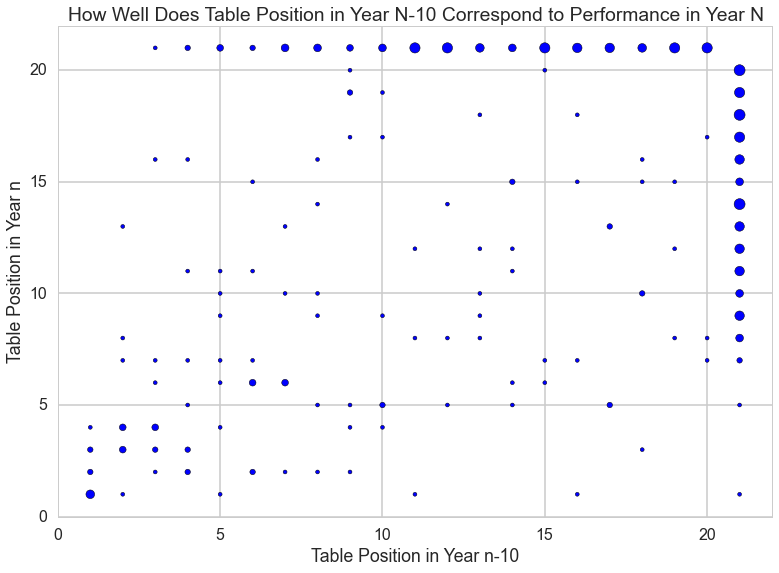

In [39]:
a,b = compile_everything(table_dict, years_past=10, s_ = 15);

In [40]:
b

{(1, 1): [5,
  [(u'Chelsea', '2004-2014'),
   (u'Manchester United', '2002-2012'),
   (u'Manchester United', '1998-2008'),
   (u'Manchester United', '2000-2010'),
   (u'Manchester United', '1996-2006')]],
 (1, 2): [2,
  [(u'Manchester United', '1999-2009'), (u'Manchester United', '1995-2005')]],
 (1, 3): [2, [(u'Arsenal', '1997-2007'), (u'Arsenal', '2001-2011')]],
 (1, 4): [1, [(u'Arsenal', '2003-2013')]],
 (2, 1): [1, [(u'Manchester United', '1997-2007')]],
 (2, 3): [3,
  [(u'Arsenal', '1999-2009'),
   (u'Arsenal', '2004-2014'),
   (u'Chelsea', '2003-2013')]],
 (2, 4): [3,
  [(u'Arsenal', '2002-2012'),
   (u'Arsenal', '1998-2008'),
   (u'Arsenal', '2000-2010')]],
 (2, 7): [1, [(u'Newcastle United', '1995-2005')]],
 (2, 8): [1, [(u'Liverpool', '2001-2011')]],
 (2, 13): [1, [(u'Newcastle United', '1996-2006')]],
 (3, 2): [1, [(u'Manchester United', '2001-2011')]],
 (3, 3): [2, [(u'Liverpool', '1995-2005'), (u'Chelsea', '1998-2008')]],
 (3, 4): [3,
  [(u'Liverpool', '1997-2007'),
   (u'M

In [41]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     49.36
Date:                Sun, 06 Dec 2015   Prob (F-statistic):           1.60e-11
Time:                        13:46:03   Log-Likelihood:                -924.91
No. Observations:                 284   AIC:                             1854.
Df Residuals:                     282   BIC:                             1861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.3544      0.836      9.995      0.000         6.709    10.000
X              0.3860      0.055      7.026      0.000         0.278     0.494
==============================================================================
Omnibus:                      153.006   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.127
Skew:                           0.012   Prob(JB):                     0.000191
Kurtosis:                       1.797   Cond. No.                         34.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
%%time
%%capture
pval_dict = {}
for y in range (1,30):
    try:
        val = compile_everything(table_dict, years_past=y)[0].pvalues
    except ValueError:
        break
    else:
        pval_dict[y] = val

Wall time: 927 ms


In [43]:
np.log(zip(*pval_dict.values())[1])

array([-176.34778368, -114.74097342,  -80.25983041,  -64.58947866,
        -48.51878256,  -42.66358359,  -35.45639567,  -28.25714346,
        -26.58621145,  -24.85872235,  -20.15122047,  -16.61797851,
        -10.34196403,   -8.62211346,   -7.73595166,   -4.87580611,
         -4.21975887,   -3.73024801,   -1.29312329])

In [44]:
pval_dict.keys()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

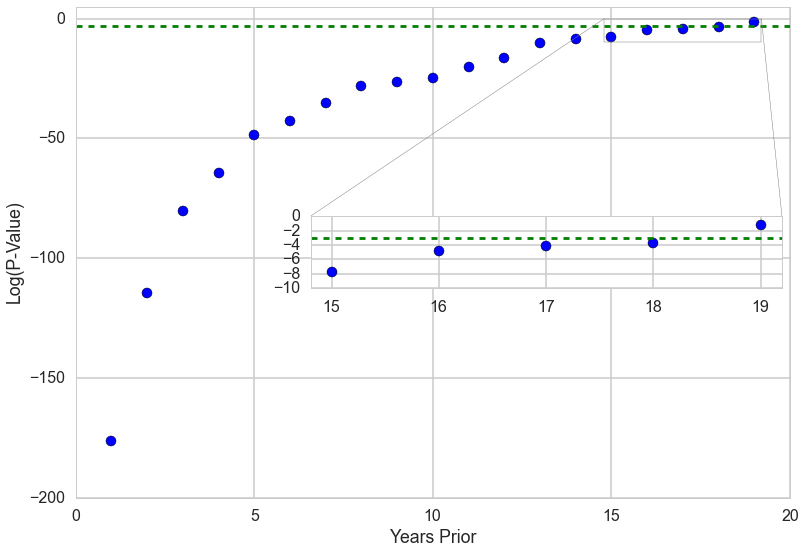

In [45]:
fig, ax = plt.subplots()
plt.axhline(y = np.log(.05), c = 'g', linestyle = 'dashed')
plt.scatter(y = np.log(zip(*pval_dict.values())[1]), x = pval_dict.keys(), s = 100, c = 'b')
plt.ylim([-200,5])
plt.xlabel('Years Prior')
plt.ylabel('Log(P-Value)');


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 3, loc=5)
plt.axhline(y = np.log(.05), c = 'g', linestyle = 'dashed')
plt.scatter(y = np.log(zip(*pval_dict.values())[1]), x = pval_dict.keys(), s = 100, c = 'b')
axins.set_xlim(14.8, 19.2) # apply the x-limits
axins.set_ylim(-10, 0)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5");
